#**Tugas Pemrograman 2 Pengantar AI**

**Kelompok : 6**

**Kelas : IF-43-09**

**Nama Anggota Kelompok :**
1. Claudia Mei Serin Sitio / 1301190424
2. Priyan Fadhil Supriyadi / 1301190442
3. Vena Erla Candrika / 1301194040

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = 'https://github.com/priyanfadhil/simplefuzzy/blob/main/restoran.xlsx?raw=true'
data_resto = pd.read_excel(url)
data_resto.columns = ["id", "pelayanan", "makanan"]
data_resto.head(10)

,id,pelayanan,makanan
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4
5,6,59,10
6,7,61,8
7,8,30,10
8,9,45,1
9,10,36,9


### **Fungsi Keanggotaan Makanan**
mendefinisikan fungsi keanggotaan <br>
tidak enak, cukup, enak, sangat enak

In [ ]:
a = 3
b = 4
c = 6
d = 7
e = 8
f = 9

In [ ]:
def tidak_enak(makanan):
  if makanan <= a:
    return 1
  if makanan > a and makanan < b :
    return -(makanan - b) / (b - a)
  elif makanan >= b:
    return 0

def biasa(makanan):
  if makanan > a and makanan < b:
    return (makanan - a) / (b - a)
  if makanan >= b and makanan <= c:
    return 1
  if makanan > c and makanan < d:
    return -(makanan - d) / (d - c)
  elif makanan <= a or makanan >= d:
    return 0

def enak(makanan):
  if makanan > c and makanan < d:
    return (makanan - c) / (d - c)
  if makanan >= d and makanan <= e:
    return 1
  if makanan > e and makanan < f:
    return -(makanan - f) / (f - e)
  elif makanan <= c or makanan >= f:
    return 0

def sangat_enak(makanan):
  if makanan >= f:
    return 1
  if makanan > e and makanan < f :
    return (makanan - e) / (f - e)
  elif makanan <= e:
    return 0

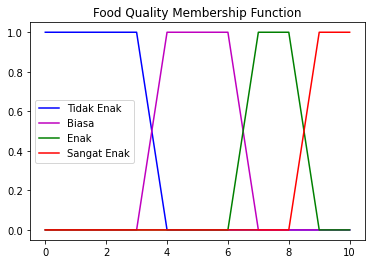

In [ ]:
value = range(11)
plt.plot(value, [tidak_enak(x) for x in value], 'b')
plt.plot(value, [biasa(x) for x in value], 'm')
plt.plot(value, [enak(x) for x in value], 'g')
plt.plot(value, [sangat_enak(x) for x in value], 'r')
plt.title("Food Quality Membership Function")

plt.plot(0, 0, 'b', label='Tidak Enak')
plt.plot(0, 0, 'm', label='Biasa')
plt.plot(0, 0, 'g', label='Enak')
plt.plot(0, 0, 'r', label='Sangat Enak')
plt.legend()
plt.show()

### **Fungsi Keanggotaan Pelayanan**
mendefinisikan fungsi keanggotaan <br>
buruk, cukup, bagus, sangat bagus

In [ ]:
g = 30
h = 40
i = 60
j = 70
k = 80
l = 90

In [ ]:
def buruk(pelayanan):
  if pelayanan <= g:
    return 1
  if pelayanan > g and pelayanan < h :
    return -(pelayanan - h) / (h - g)
  elif pelayanan >= h:
    return 0

def cukup(pelayanan):
  if pelayanan > g and pelayanan < h:
    return (pelayanan - g) / (h - g)
  if pelayanan >= h and pelayanan <= i:
    return 1
  if pelayanan > i and pelayanan < j:
    return -(pelayanan - j) / (j - i)
  elif pelayanan <= g or pelayanan >= j:
    return 0

def bagus(pelayanan):
  if pelayanan > i and pelayanan < j:
    return (pelayanan - i) / (j - i)
  if pelayanan >= j and pelayanan <= k:
    return 1
  if pelayanan > k and pelayanan < l:
    return -(pelayanan - l) / (l - k)
  elif pelayanan <= i or pelayanan >= l:
    return 0

def sangat_bagus(pelayanan):
  if pelayanan >= l:
    return 1
  if pelayanan > k and pelayanan < l :
    return (pelayanan - k) / (l - k)
  elif pelayanan <= k:
    return 0


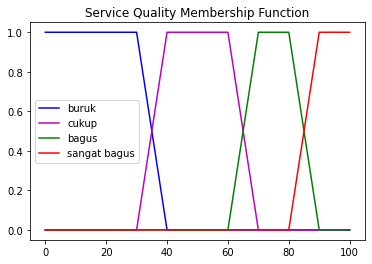

In [ ]:
value = range(101)
plt.plot(value, [buruk(x) for x in value], 'b')
plt.plot(value, [cukup(x) for x in value], 'm')
plt.plot(value, [bagus(x) for x in value], 'g')
plt.plot(value, [sangat_bagus(x) for x in value], 'r')
plt.title("Service Quality Membership Function")

plt.plot(0, 0, 'b', label='buruk')
plt.plot(0, 0, 'm', label='cukup')
plt.plot(0, 0, 'g', label='bagus')
plt.plot(0, 0, 'r', label='sangat bagus')
plt.legend()
plt.show()

### **Fuzifikasi**

In [ ]:
def fuzzifikasi_makanan(nilai_makanan):
    food_set = {}
    food_set['tidak enak'] = tidak_enak(nilai_makanan)
    food_set['biasa'] = biasa(nilai_makanan)
    food_set['enak'] = enak(nilai_makanan)
    food_set['sangat enak'] = sangat_enak(nilai_makanan)
    return food_set

def fuzzifikasi_pelayanan(nilai_pelayanan):
    service_set = {}
    service_set['buruk'] = buruk(nilai_pelayanan)
    service_set['cukup'] = cukup(nilai_pelayanan)
    service_set['bagus'] = bagus(nilai_pelayanan)
    service_set['sangat bagus'] = sangat_bagus(nilai_pelayanan)
    return service_set

### **Inferensi dan Disjunction/Conjunction**

In [ ]:
def inferensi(food_set,  service_set):
  inference_set = {'direkomendasikan': [],'sedang': [], 'tidak direkomendasikan': []}

  inference_set['direkomendasikan'].append(min(food_set['sangat enak'],service_set['sangat bagus']))
  inference_set['direkomendasikan'].append(min(food_set['sangat enak'],service_set['bagus']))
  inference_set['sedang'].append(min(food_set['sangat enak'],service_set['cukup']))
  inference_set['tidak direkomendasikan'].append(min(food_set['sangat enak'],service_set['buruk']))

  inference_set['direkomendasikan'].append(min(food_set['enak'],service_set['sangat bagus']))
  inference_set['sedang'].append(min(food_set['enak'],service_set['bagus']))
  inference_set['sedang'].append(min(food_set['enak'],service_set['cukup']))
  inference_set['tidak direkomendasikan'].append(min(food_set['enak'],service_set['buruk']))
  
  inference_set['sedang'].append(min(food_set['biasa'],service_set['sangat bagus']))
  inference_set['sedang'].append(min(food_set['biasa'],service_set['bagus']))
  inference_set['tidak direkomendasikan'].append(min(food_set['biasa'],service_set['cukup']))
  inference_set['tidak direkomendasikan'].append(min(food_set['biasa'],service_set['buruk']))

  inference_set['tidak direkomendasikan'].append(min(food_set['tidak enak'],service_set['sangat bagus']))
  inference_set['tidak direkomendasikan'].append(min(food_set['tidak enak'],service_set['bagus']))
  inference_set['tidak direkomendasikan'].append(min(food_set['tidak enak'],service_set['cukup']))
  inference_set['tidak direkomendasikan'].append(min(food_set['tidak enak'],service_set['buruk']))

  inference_set['direkomendasikan'] = max(inference_set['direkomendasikan'])
  inference_set['sedang'] = max(inference_set['sedang'])
  inference_set['tidak direkomendasikan'] = max(inference_set['tidak direkomendasikan'])

  return inference_set

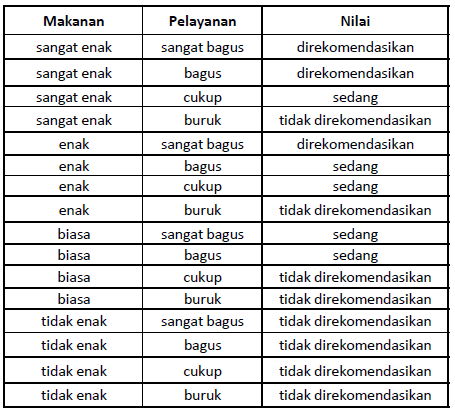

### **Defuzifikasi**

In [ ]:
def defuzzifikasi(inference_set):
  numerator, denominator = 0, 0
  defuz_set = {'direkomendasikan': 100, 'sedang': 70, 'tidak direkomendasikan': 50}

  for i in defuz_set.keys():
        numerator += inference_set[i] * defuz_set[i]
        denominator += inference_set[i]
  return numerator/denominator


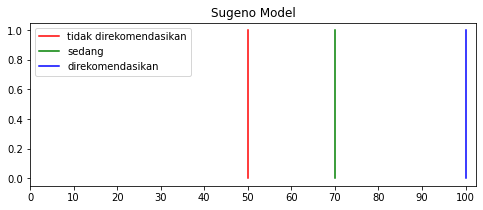

In [ ]:
plt.figure(figsize=(8, 3))
plt.title("Sugeno Model")

plt.plot([50, 50], [0, 1], label="tidak direkomendasikan", color='r')
plt.plot([70, 70], [0, 1], label="sedang", color='g')
plt.plot([100, 100], [0, 1], label="direkomendasikan", color='b')
plt.xticks(np.arange(0, 101, 10.0))
plt.legend()
plt.show()

### **Main Program**

In [ ]:
hasil_defuz = []

def fuzzy_system(data_resto):
  for i in range (len(data_resto)):
    food = fuzzifikasi_makanan(data_resto['makanan'][i])
    service = fuzzifikasi_pelayanan(data_resto['pelayanan'][i])
    #print(food, service)
    inference_set =  inferensi(food, service)
    print(inference_set)
    result = defuzzifikasi(inference_set)
    #print(result)
    hasil_defuz.append(result)

  return hasil_defuz

data = fuzzy_system(data_resto)
data_resto['hasil'] = data

{'direkomendasikan': 0, 'sedang': 1, 'tidak direkomendasikan': 0}
{'direkomendasikan': 0, 'sedang': 0, 'tidak direkomendasikan': 1}
{'direkomendasikan': 0, 'sedang': 0, 'tidak direkomendasikan': 1}
{'direkomendasikan': 0, 'sedang': 0, 'tidak direkomendasikan': 1}
{'direkomendasikan': 0, 'sedang': 0, 'tidak direkomendasikan': 1}
{'direkomendasikan': 0, 'sedang': 1, 'tidak direkomendasikan': 0}
{'direkomendasikan': 0, 'sedang': 0.9, 'tidak direkomendasikan': 0}
{'direkomendasikan': 0, 'sedang': 0, 'tidak direkomendasikan': 1}
{'direkomendasikan': 0, 'sedang': 0, 'tidak direkomendasikan': 1}
{'direkomendasikan': 0, 'sedang': 0.6, 'tidak direkomendasikan': 0.4}
{'direkomendasikan': 0, 'sedang': 0, 'tidak direkomendasikan': 1}
{'direkomendasikan': 0, 'sedang': 0.8, 'tidak direkomendasikan': 0.2}
{'direkomendasikan': 0, 'sedang': 0, 'tidak direkomendasikan': 1}
{'direkomendasikan': 0, 'sedang': 0.1, 'tidak direkomendasikan': 0.9}
{'direkomendasikan': 0, 'sedang': 1, 'tidak direkomendasikan':

In [ ]:
data_resto = data_resto.sort_values(by='hasil', ascending=False)
data_resto = data_resto.head(10)

data_resto['id'].to_excel('peringkat.xls', index=False, header=False)  
data_resto

,id,pelayanan,makanan,hasil
23,24,100,9,100.0
30,31,74,9,100.0
78,79,87,9,100.0
68,69,86,10,100.0
21,22,79,9,100.0
41,42,94,10,100.0
53,54,64,10,82.0
24,25,61,10,73.0
26,27,59,8,70.0
33,34,93,4,70.0
